In [ ]:
%pylab inline
%load_ext autotime
%load_ext autoreload
%autoreload 2
import scanpy as sc
import pandas as pd
from pysctransform.pysctransform import vst
from pysctransform.plotting import plot_fit, plot_residual_var, compare_with_sct

In [ ]:
pbmc33k = sc.read_h5ad("../data/pbmc33k.h5ad")
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")

# PBMC3k - Using all genes and all cells

In [ ]:
# Input is gene x cell
vst_out_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    method="glmgp",
    n_cells=None,
    n_genes=2000,
)

## Plot model and regularized parameters

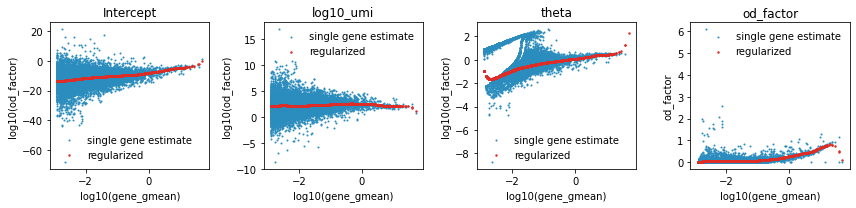

time: 5.2 s (started: 2021-03-07 02:31:56 -05:00)


In [4]:
_ = plot_fit(vst_out_3k)

In [5]:
plot_residual_var(vst_out_3k)

<AxesSubplot:xlabel='Gene gmean', ylabel='Residual variance'>

time: 23.6 s (started: 2021-03-07 02:32:01 -05:00)


## Compare with R SCTransform

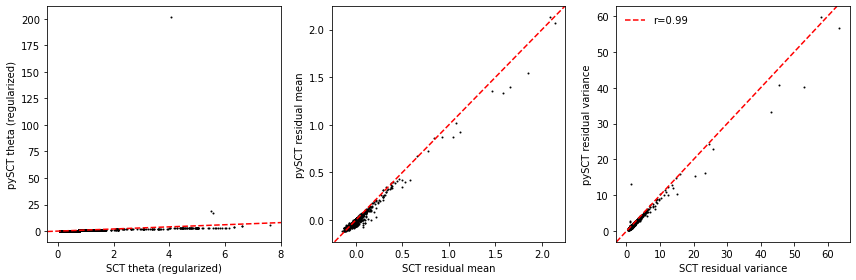

time: 1.93 s (started: 2021-03-07 02:36:33 -05:00)


In [7]:
compare_with_sct(
    vst_out_3k,
    sct_modelparsfit_file="~/data/pbmc3k/pbmc3k_thetaml_model_pars_fit.csv",
    sct_geneattr_file="~/data/pbmc3k/pbmc3k_thetaml_gene_attr.csv",
)

# PBMC 33k - Using 2k genes and 5k cells

In [8]:
### Input is gene x cell
vst_out_33k = vst(
    pbmc33k.X.T,
    gene_names=pbmc33k.var_names.tolist(),
    cell_names=pbmc33k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=5000,
    n_genes=2000,
)

Running Step1
Step1 done. Took 110.0 seconds.
Running Step2
outliers: 59
Step2 done. Took 11.0 seconds.
Running Step3
Step3 done. Took 32.0 seconds.
time: 2min 50s (started: 2021-03-07 02:37:08 -05:00)


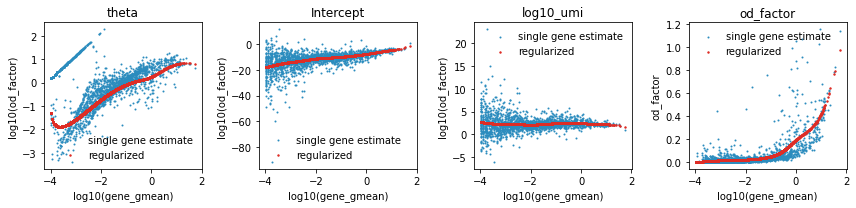

time: 4.12 s (started: 2021-03-07 02:39:59 -05:00)


In [9]:
_ = plot_fit(vst_out_33k)

<AxesSubplot:xlabel='Gene gmean', ylabel='Residual variance'>

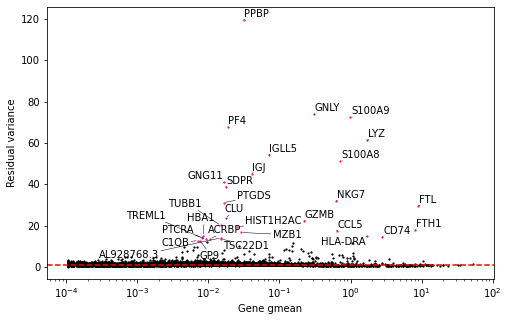

time: 29.2 s (started: 2021-03-07 02:40:03 -05:00)


In [10]:
plot_residual_var(vst_out_33k)

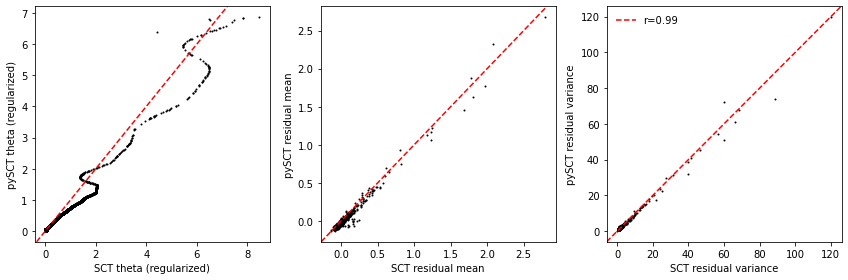

time: 1.76 s (started: 2021-03-07 02:40:32 -05:00)


In [11]:
compare_with_sct(
    vst_out_33k,
    sct_modelparsfit_file="~/data/pbmc33k/pbmc33k_thetaml_model_pars_fit.csv",
    sct_geneattr_file="~/data/pbmc33k/pbmc33k_thetaml_gene_attr.csv"
)

# Try another estimator - theta_ml with LBFGS

In [12]:
### Input is gene x cell
vst_out_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="theta_lbfgs",
    n_genes=2000
)

Running Step1


100%|██████████| 2000/2000 [00:49<00:00, 40.17it/s]


Step1 done. Took 51.0 seconds.
Running Step2
outliers: 213
Step2 done. Took 9.0 seconds.
Running Step3
Step3 done. Took 3.0 seconds.
time: 1min 3s (started: 2021-03-07 02:40:34 -05:00)


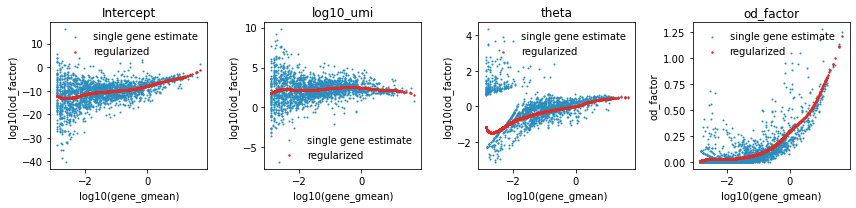

time: 3.44 s (started: 2021-03-07 02:41:38 -05:00)


In [13]:
_ = plot_fit(vst_out_3k)

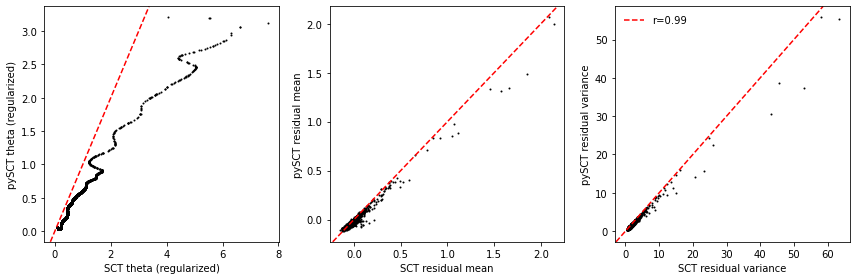

time: 1.62 s (started: 2021-03-07 02:41:41 -05:00)


In [14]:
compare_with_sct(
    vst_out_3k,
    sct_modelparsfit_file="~/data/pbmc3k/pbmc3k_thetaml_model_pars_fit.csv",
    sct_geneattr_file="~/data/pbmc3k/pbmc3k_thetaml_gene_attr.csv",
)

<AxesSubplot:xlabel='Gene gmean', ylabel='Residual variance'>

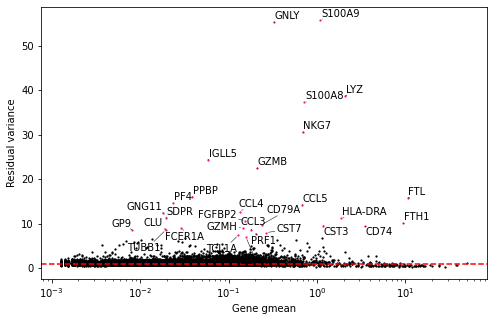

time: 23.6 s (started: 2021-03-07 02:41:43 -05:00)


In [15]:
plot_residual_var(vst_out_3k)

# Try yet another estimator - theta_ml with LBFGS applied to 1/theta parameter

In [16]:
### Input is gene x cell
vst_out_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="alpha_lbfgs",
    n_genes=2000
)

Running Step1


100%|██████████| 2000/2000 [00:43<00:00, 46.36it/s]


Step1 done. Took 44.0 seconds.
Running Step2
outliers: 168
Step2 done. Took 9.0 seconds.
Running Step3
Step3 done. Took 3.0 seconds.
time: 57 s (started: 2021-03-07 02:42:07 -05:00)


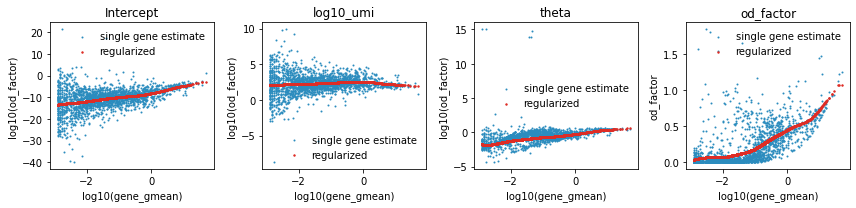

time: 3.1 s (started: 2021-03-07 02:43:03 -05:00)


In [17]:
_ = plot_fit(vst_out_3k)

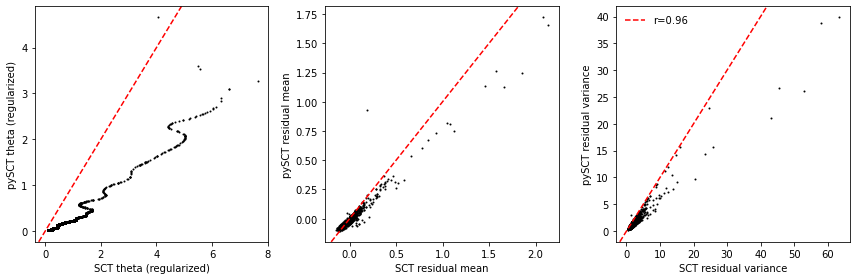

time: 1.31 s (started: 2021-03-07 02:43:07 -05:00)


In [18]:
compare_with_sct(
    vst_out_3k,
    sct_modelparsfit_file="~/data/pbmc3k/pbmc3k_thetaml_model_pars_fit.csv",
    sct_geneattr_file="~/data/pbmc3k/pbmc3k_thetaml_gene_attr.csv",
)

<AxesSubplot:xlabel='Gene gmean', ylabel='Residual variance'>

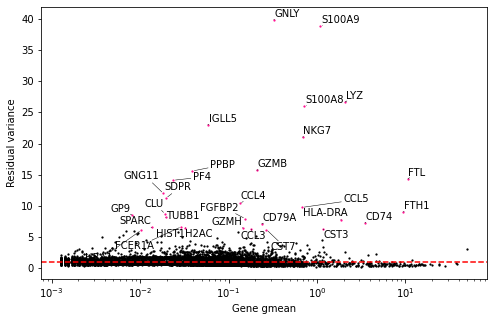

time: 27.9 s (started: 2021-03-07 02:43:08 -05:00)


In [19]:
plot_residual_var(vst_out_3k)